In [2]:
import pandas as pd 
import numpy as np 
import os
import numpy as np
import json

with open('/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/proteomics_combinations.json', 'r') as file:
	protein_sets = json.load(file)

protein_categories = protein_sets['IPS_pathways']
pathways_names = list(protein_categories.keys())
pathways_prots = list(protein_categories.values())

print(pathways_names)

['BIOCARTA_ATRBRCA_PATHWAY', 'HALLMARK_DNA_REPAIR', 'KEGG_BASE_EXCISION_REPAIR', 'KEGG_HOMOLOGOUS_RECOMBINATION', 'KEGG_MISMATCH_REPAIR', 'KEGG_NON_HOMOLOGOUS_END_JOINING', 'KEGG_NUCLEOTIDE_EXCISION_REPAIR', 'REACTOME_BASE_EXCISION_REPAIR', 'REACTOME_BASE_EXCISION_REPAIR_AP_SITE_FORMATION', 'REACTOME_DISEASES_OF_BASE_EXCISION_REPAIR', 'REACTOME_DISEASES_OF_DNA_REPAIR', 'REACTOME_DISEASES_OF_MISMATCH_REPAIR_MMR', 'REACTOME_DNA_DOUBLE_STRAND_BREAK_REPAIR', 'REACTOME_DNA_REPAIR', 'REACTOME_GAP_FILLING_DNA_REPAIR_SYNTHESIS_AND_LIGATION_IN_GG_NER', 'REACTOME_GLOBAL_GENOME_NUCLEOTIDE_EXCISION_REPAIR_GG_NER', 'REACTOME_HDR_THROUGH_HOMOLOGOUS_RECOMBINATION_HRR', 'REACTOME_HOMOLOGOUS_DNA_PAIRING_AND_STRAND_EXCHANGE', 'REACTOME_HOMOLOGY_DIRECTED_REPAIR', 'REACTOME_MISMATCH_REPAIR', 'REACTOME_NONHOMOLOGOUS_END_JOINING_NHEJ', 'REACTOME_NUCLEOTIDE_EXCISION_REPAIR', 'REACTOME_PCNA_DEPENDENT_LONG_PATCH_BASE_EXCISION_REPAIR', 'REACTOME_POLB_DEPENDENT_LONG_PATCH_BASE_EXCISION_REPAIR', 'REACTOME_PROTEIN

In [3]:
# Define the path to the main subfolder
main_subfolder = "/mnt/ncshare/ozkilim/BRCA/heatmaps/IPS_pathways_heatmaps/heatmap_raw_results/HGSOC_MCAT_UAB_IPS_pathways/Unspecified"

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# Loop over subfolders in the main subfolder
# Loop over subfolders in the main subfolder
for subfolder in os.listdir(main_subfolder):
    subfolder_path = os.path.join(main_subfolder, subfolder)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Find all .npy files in the subfolder
        npy_files = [f for f in os.listdir(subfolder_path) if f.endswith('.npy')]
        
        # Load each .npy file as a NumPy array
        for npy_file in npy_files:
            npy_file_path = os.path.join(subfolder_path, npy_file)
            np_array = np.load(npy_file_path)
            
            # Calculate the order of the original indices after sorting
            order = np.argsort(np_array)
            # Create a DataFrame for this column
            column_df = pd.DataFrame({subfolder: order[0]})
            # Add the column DataFrame to the result DataFrame
            result_df = pd.concat([result_df, column_df], axis=1)

# Print the resulting DataFrame
result_df.head()

,1009828_271292_ImageActual,1009810_271267_ImageActual,1009862_271322_ImageActual,1009627_269136_ImageActual,1009792_271298_ImageActual,1009439_171060_ImageActual,1009841_271316_ImageActual,1009665_269174_ImageActual,1009650_269159_ImageActual,1009791_271244_ImageActual,...,1009543_171082_ImageActual,1009485_171131_ImageActual,1009444_171012_ImageActual,1009648_269157_ImageActual,1009493_171034_ImageActual,1009435_171150_ImageActual,1009476_171143_ImageActual,1009678_269187_ImageActual,1009675_269184_ImageActual,1009682_269191_ImageActual
0,24,3,22,9,18,9,24,9,9,17,...,23,24,23,9,9,9,9,16,26,16
1,18,21,31,32,9,28,16,14,17,3,...,24,9,30,5,24,3,33,24,24,9
2,26,5,9,20,24,8,34,11,34,9,...,2,8,22,20,30,33,1,5,27,3
3,21,26,28,12,23,22,30,34,5,24,...,8,33,9,32,26,32,31,25,5,25
4,15,28,2,24,20,14,15,25,14,32,...,9,29,28,1,16,2,6,35,20,19


In [4]:
to_save = result_df.copy()
to_save.index=pathways_names
to_save.head(50)
# to_save.to_csv("pathway_cohort_rankings_.csv")

,1009828_271292_ImageActual,1009810_271267_ImageActual,1009862_271322_ImageActual,1009627_269136_ImageActual,1009792_271298_ImageActual,1009439_171060_ImageActual,1009841_271316_ImageActual,1009665_269174_ImageActual,1009650_269159_ImageActual,1009791_271244_ImageActual,...,1009543_171082_ImageActual,1009485_171131_ImageActual,1009444_171012_ImageActual,1009648_269157_ImageActual,1009493_171034_ImageActual,1009435_171150_ImageActual,1009476_171143_ImageActual,1009678_269187_ImageActual,1009675_269184_ImageActual,1009682_269191_ImageActual
BIOCARTA_ATRBRCA_PATHWAY,24,3,22,9,18,9,24,9,9,17,...,23,24,23,9,9,9,9,16,26,16
HALLMARK_DNA_REPAIR,18,21,31,32,9,28,16,14,17,3,...,24,9,30,5,24,3,33,24,24,9
KEGG_BASE_EXCISION_REPAIR,26,5,9,20,24,8,34,11,34,9,...,2,8,22,20,30,33,1,5,27,3
KEGG_HOMOLOGOUS_RECOMBINATION,21,26,28,12,23,22,30,34,5,24,...,8,33,9,32,26,32,31,25,5,25
KEGG_MISMATCH_REPAIR,15,28,2,24,20,14,15,25,14,32,...,9,29,28,1,16,2,6,35,20,19
KEGG_NON_HOMOLOGOUS_END_JOINING,6,20,14,26,7,33,13,31,25,16,...,35,2,3,3,8,16,2,20,3,24
KEGG_NUCLEOTIDE_EXCISION_REPAIR,30,32,35,30,25,15,7,24,15,23,...,28,19,5,26,2,19,25,3,9,0
REACTOME_BASE_EXCISION_REPAIR,17,18,7,11,17,2,21,22,16,31,...,15,3,31,22,21,29,7,31,1,29
REACTOME_BASE_EXCISION_REPAIR_AP_SITE_FORMATION,33,16,3,2,12,1,27,0,8,22,...,34,31,19,25,1,4,26,19,0,15
REACTOME_DISEASES_OF_BASE_EXCISION_REPAIR,13,22,10,3,0,20,18,23,19,26,...,22,6,2,12,35,31,18,22,25,30


In [5]:
# now select columns given labels... 
df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/process_lists/HGSOC_UAB_hold_out_Metastatic_process_list.csv")
df = df[["label","slide_id"]]

filtered_new_df = df[df["label"] == 0]
# Get the list of subfolders from the filtered DataFrame
selected_subfolders = filtered_new_df["slide_id"].tolist()
# Select columns from result_df based on the selected subfolders
selected_columns = result_df[selected_subfolders]
mean_ranks = selected_columns.mean(axis=1)
# Create a DataFrame with the mean ranks and the corresponding items
mean_rank_df = pd.DataFrame({'Item': mean_ranks.index, 'MeanRank': mean_ranks.values})
# Sort the items based on their mean ranks to obtain the ensemble ranking
ensemble_ranking = mean_rank_df.sort_values(by='MeanRank')
# Reset the index of the ensemble ranking DataFrame
ensemble_ranking.reset_index(drop=True, inplace=True)
# Print the ensemble ranking
overall_ranking = ensemble_ranking["Item"].to_list()
ordered_pathways_resistant = [pathways_names[i] for i in overall_ranking]


filtered_new_df = df[df["label"] == 1]
# Get the list of subfolders from the filtered DataFrame
selected_subfolders = filtered_new_df["slide_id"].tolist()
# Select columns from result_df based on the selected subfolders
selected_columns = result_df[selected_subfolders]
mean_ranks = selected_columns.mean(axis=1)
# Create a DataFrame with the mean ranks and the corresponding items
mean_rank_df = pd.DataFrame({'Item': mean_ranks.index, 'MeanRank': mean_ranks.values})
# Sort the items based on their mean ranks to obtain the ensemble ranking
ensemble_ranking = mean_rank_df.sort_values(by='MeanRank')
# Reset the index of the ensemble ranking DataFrame
ensemble_ranking.reset_index(drop=True, inplace=True)
# Print the ensemble ranking
overall_ranking = ensemble_ranking["Item"].to_list()
ordered_pathways_sensitive = [pathways_names[i] for i in overall_ranking] 

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5286,5287) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['Homology Directed Repair', 'Diseases Of Mismatch Repair Mmr', 'Diseases Of Base Excision Repair', 'Homologous Recombination', 'Hdr Through Homologous Recombination Hrr', 'Pcna Dependent Long Patch Base Excision Repair', 'Dna Mismatch Repair', 'Base Excision Repair', 'Dna Repair', 'Nonhomologous End Joining Nhej', 'Nucleotide Excision Repair', 'Homologous Dna Pairing And Strand Exchange', 'Tp53 Regulates Transcription Of Dna Repair Genes', 'Mismatch Repair', 'Dna Double Strand Break Repair', 'Nucleotide Excision Repair In Xeroderma Pigmentosum', 'Non Homologous End Joining', 'Global Genome Nucleotide Excision Repair Gg Ner', 'Protein Repair', 'Base Excision Repair Ap Site Formation', 'Dna Repair Pathways Full Network', 'Sumoylation Of Dna Damage Response And Repair Proteins', 'Gap Filling Dna Repair Synthesis And Ligation In Gg Ner', 'Polb Dependent Long Patch Base Excision Repair', 'Transcription Coupled Nucleotide Excision Repair Tc Ner', 'Signature', 'Diseases Of Dna Repair', 'Nonh

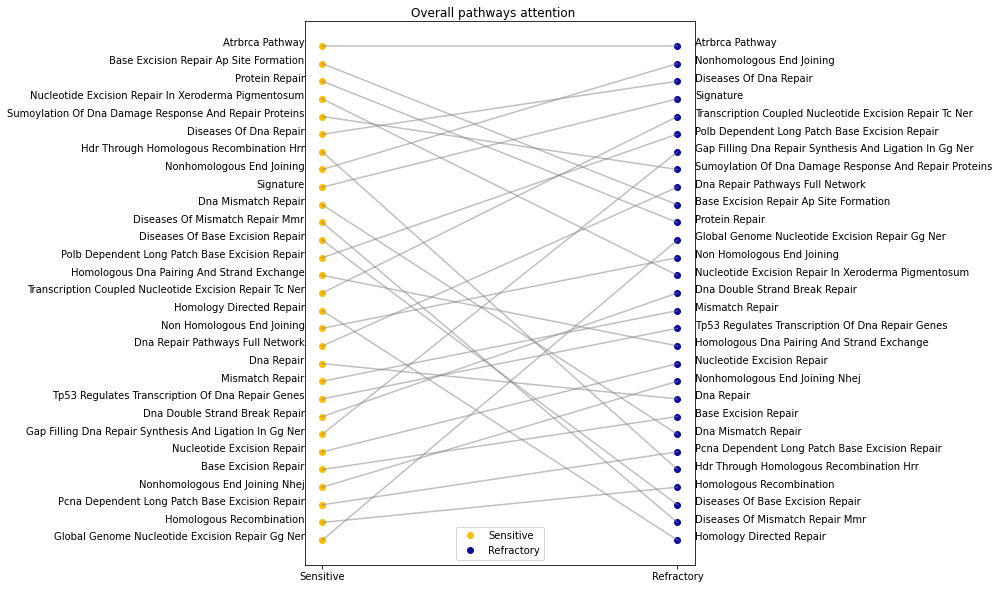

In [16]:
import matplotlib.pyplot as plt

# Example data
list1 = ordered_pathways_sensitive.copy()[::-1]
list1 = [' '.join(word.capitalize() for word in item.split('_')[1:]) for item in list1]
seen = set()
list1 = [x for x in list1 if not (x in seen or seen.add(x))]

#TODO: ! check order did not change when grouping


list2 = ordered_pathways_resistant.copy()[::-1]
list2 = [' '.join(word.capitalize() for word in item.split('_')[1:]) for item in list2]
seen = set()
list2 = [x for x in list2 if not (x in seen or seen.add(x))]

print(list2)
# Determine the positions of list1 items in list2
positions_list1 = range(len(list1))
positions_list2 = [list2.index(item) for item in list1]  # Finds the index of list1 items in list2

# Plotting
plt.figure(figsize=(7, 10))

# Plotting points for each list
plt.plot([0]*len(list1), positions_list1, 'o', color='#FFBD00', label='Sensitive')
plt.plot([1]*len(list2), positions_list2, 'o', color='#090C9B', label='Refractory')

# Drawing lines between the same items
for pos1, pos2 in zip(positions_list1, positions_list2):
    plt.plot([0, 1], [pos1, pos2], 'grey', alpha=0.5)

# Labeling
for position, label in zip(positions_list1, list1):
    plt.text(-0.05, position, label, ha='right')
for position, label in zip(positions_list2, list1):  # Use list1 to ensure labels match the lines
    plt.text(1.05, position, label, ha='left')

plt.yticks([])  # Hide y-axis ticks
plt.xticks([0, 1], ['Sensitive', 'Refractory'])
plt.legend()
plt.suptitle("Overall pathways attention",y=0.90)
# plt.tight_layout()
plt.savefig("../../figures/IPS_pathways_rankings.png", facecolor='white', dpi=300,bbox_inches='tight')
plt.show()

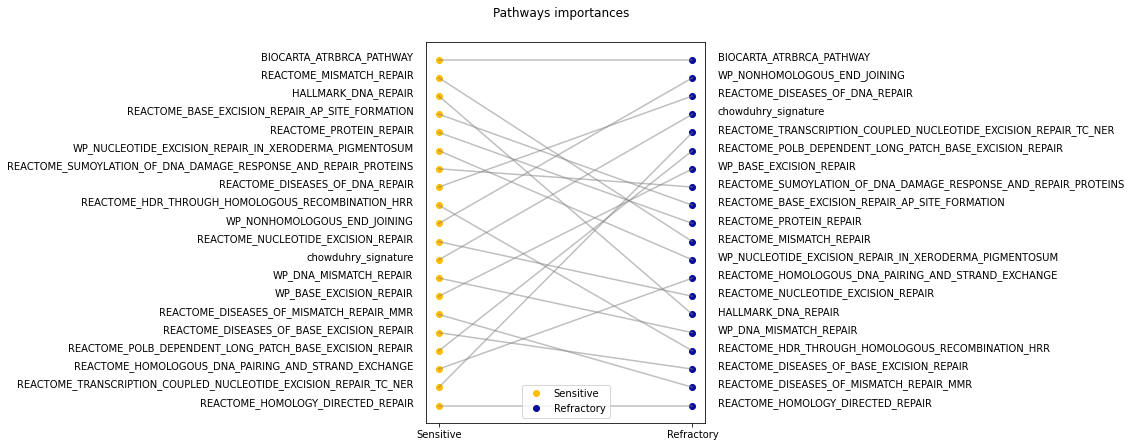

In [7]:
# Assuming ordered_pathways_sensitive and ordered_pathways_resistant are defined and imported
# list1 and list2 are initially reversed to prioritize the top items
list1_initial = ordered_pathways_sensitive.copy()
list2_initial = ordered_pathways_resistant.copy()

# Find common items
common_items = set(list1_initial) & set(list2_initial)

# Select top 6 common items, prioritizing the order in list1 and list2
top_common_items = []
for item in list1_initial + list2_initial:  # Iterate through both lists to maintain priority
    if item in common_items and item not in top_common_items:
        top_common_items.append(item)
        if len(top_common_items) == 20:  # Stop when you have 6 items
            break

# Filter original lists to include only the selected top 6 common items
list1 = [item for item in list1_initial if item in top_common_items][::-1]
list2 = [item for item in list2_initial if item in top_common_items][::-1]


# Plotting adjustments are similar but applied to the filtered lists
import matplotlib.pyplot as plt

# Determine the positions of list1 items in list2
positions_list1 = range(len(list1))
positions_list2 = [list2.index(item) for item in list1]  # Finds the index of list1 items in list2

plt.figure(figsize=(5, 7))
plt.plot([0]*len(list1), positions_list1, 'o', color='#FFBD00', label='Sensitive')
plt.plot([1]*len(list2), positions_list2, 'o', color='#090C9B', label='Refractory')

for pos1, pos2 in zip(positions_list1, positions_list2):
    plt.plot([0, 1], [pos1, pos2], 'grey', alpha=0.5)

# Labeling adjustments for the filtered lists
for position, label in zip(positions_list1, list1):
    plt.text(-0.1, position, label, ha='right')
for position, label in zip(positions_list2, list1):
    plt.text(1.1, position, label, ha='left')


plt.yticks([])  # Hide y-axis ticks
plt.xticks([0, 1], ['Sensitive', 'Refractory'])
plt.legend()
plt.suptitle("Pathways importances",y=0.95)
# plt.tight_layout()
# plt.savefig("../../figures/abstract_pathways_rankings.png", facecolor='white', dpi=300,bbox_inches='tight')

plt.legend()
plt.show()